In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from util import *
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from tqdm.notebook import tqdm

In [2]:
# 자신의 폴더 경로에 맞게 지정해주세요.
root_path = 'cityscapes_data/'

data_dir = root_path

# data_dir의 경로(문자열)와 train(문자열)을 결합해서 train_dir(train 폴더의 경로)에 저장
train_dir = os.path.join(data_dir, "train")
# train_dir 경로에 있는 모든 파일을 리스트의 형태로 불러와서 train_fns에 저장
train_fns = os.listdir(train_dir)

# data_dir의 경로(문자열)와 val(문자열)을 결합해서 val_dir(val 폴더의 경로)에 저장
val_dir = os.path.join(data_dir, "val")
# val_dir 경로에 있는 모든 파일을 리스트의 형태로 불러와서 val_fns에 저장
val_fns = os.listdir(val_dir)

print(len(train_fns), len(val_fns))

2975 500


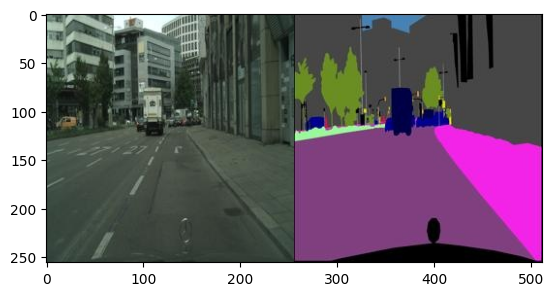

In [3]:
# train_dir(문자열)와 train_fns[0](문자열)의 경로를 결합하여 sample_image_fp(샘플 이미지의 경로)에 저장
sample_image_fp = os.path.join(train_dir, train_fns[405])

# PIL 라이브러리의 Image 모듈을 사용,sample 불러옴 
sample_image = Image.open(sample_image_fp)

plt.imshow(sample_image)
plt.show()

## output label 정의 

In [4]:
num_items = 1000

# 0~255 사이의 숫자를 3*num_items번 랜덤하게 뽑기
color_array = np.random.choice(range(256), 3*num_items).reshape(-1, 3)  #자동 조정  # 열의 크기만 3 으로 고정 ( RGB )
# 1000 개 실수가 들어있는 matrix 3 층 (랜덤 값)
print(color_array.shape)

(1000, 3)


In [7]:
num_classes = 10 
# 해당 color array 에 대해서 kmeans clustering 을 사용, 비슷한 놈들끼리 묶임. 
# 랜덤하게 뽑은 color array 로 kmeans cluster 를 fit 
label_model = KMeans(n_clusters=num_classes)
label_model.fit(color_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

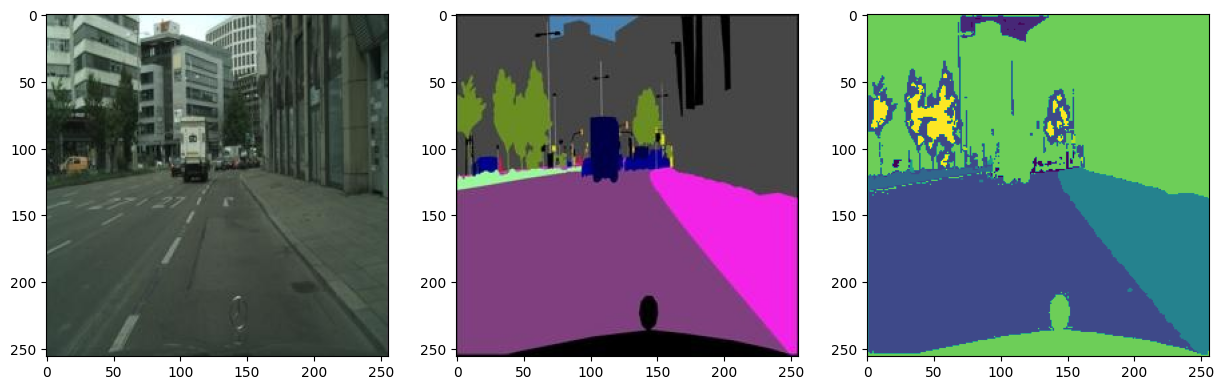

In [8]:
# 바로 이전 코드에서 정의한 split_image() 함수를 이용하여 sample_image를 분리한 후, cityscape과 label에 각각 저장
cityscape, label = split_image(sample_image)

# 랜덤하게 학습한 kmeans cluster로 label data 를 predict 
label_class = label_model.predict(label.reshape(-1, 3)).reshape(256, 256)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
axes[0].imshow(cityscape)
axes[1].imshow(label)
axes[2].imshow(label_class)

plt.show()